# A demonstration of 2, 3 and 4 parameter logistic curve calibration 
Here we utilize the work of R. Bewley and D. G. Fiebig, "A Flexible Logistic Growth Model with Applications in Telecommunications", Intl. J. of Forecasting 4, 177-192 (1988)
https://doi.org/10.1016/0169-2070(88)90076-3 
Bewley presents the Flexible Logistic Model, which is a generalisation of several other logistic curve models which allow for more flexibility than the standard 2-paramater model. Below we implement the `logistic(t,a,b)` 2-parameter model, `elog(t,a,b,u)` 3-parameter model, and `flog(t,a,b,u,k)` 4-parameter model.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

Define the form of the various adoption / logistic curves (I've moved these definitions into `logistic_functions.py`)

In [3]:
from logistic_functions import *

Define the two point calibration data (from Paul's spreadsheet) and plot together with the uncalibrated logistic curves using some made up values for the parameters (those will be used as the initial guess at their value for the non-linear curve fitting)

In [4]:
#fig1,ax1=plt.subplots()
#fig2,ax2=plt.subplots()
#t2 =np.linspace(0,25,100)
## function itself (cummulative of distribution)
#y1 = flog(t2,-4.705,0.494,1,1)
#y2 = flog(t2,-7.389,4.382,0,1.594)
#y3 = flog(t2,-7.145,2.181,-0.266,0)
#ax1.plot(t2,y1)
#ax1.plot(t2,y2)
#ax1.plot(t2,y3)
#ax1.plot(t2,y4)
## derivative of function (to look at distribution) 
#dy1 = np.diff(y1)
#dy2 = np.diff(y2)
#dy3 = np.diff(y3)
#dy4 = np.diff(y4)
#ax2.plot(t2[1:],dy1)
#ax2.plot(t2[1:],dy2)
#ax2.plot(t2[1:],dy3)
#ax2.plot(t2[1:],dy4)
#
#fig1.show()
#fig2.show()

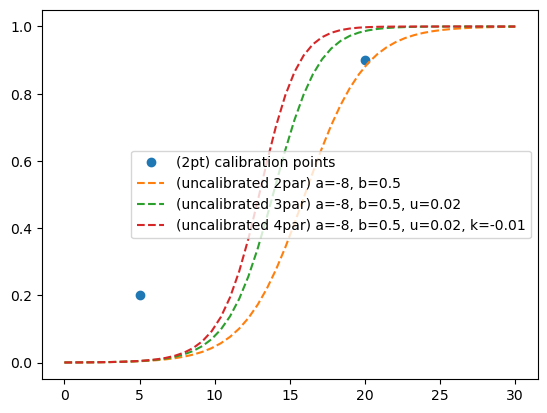

In [5]:
two_point_t = [5, 20]
two_point_f = [0.2, 0.9]

fig, ax=plt.subplots()
ax.plot(
    two_point_t,
    two_point_f,
    marker="o",
    linestyle="",
    label="(2pt) calibration points",
);

a0 = -8
b0 = 0.5
u0 = 0.02
k0 = -0.01
p_guess = [a0, b0]
p_guess3 = [a0, b0, u0]
p_guess4 = [a0, b0, u0, k0]
t = np.linspace(0, 30)
ax.plot(
    t,
    logistic(t, a0, b0),
    linestyle="--",
    label=f"(uncalibrated 2par) a={round(a0,2)}, b={round(b0,2)}",
);
ax.plot(
    t,
    elog(t, a0, b0, u0),
    linestyle="--",
    label=f"(uncalibrated 3par) a={round(a0,2)}, b={round(b0,2)}, u={round(u0,2)}",
);
ax.plot(
    t,
    flog(t, a0, b0, u0, k0),
    linestyle="--",
    label=f"(uncalibrated 4par) a={round(a0,2)}, b={round(b0,2)}, u={round(u0,2)}, k={round(k0,2)}",
);
ax.legend();


Calibrate the 2-parameter curve using the two points and plot

/Users/gre538/miniconda3/envs/jupyter-ai/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


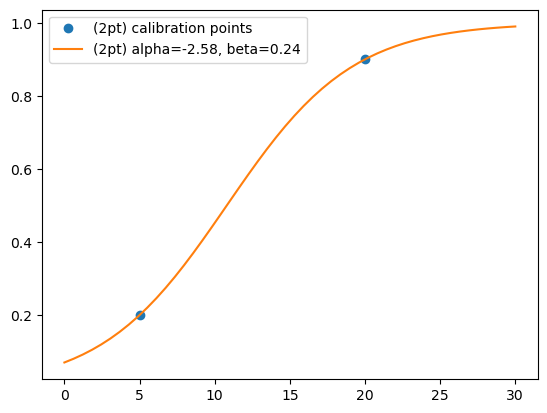

In [6]:
p2_opt = curve_fit(f=logistic, xdata=two_point_t, ydata=two_point_f, p0=p_guess);
two_point_alpha = p2_opt[0][0]
two_point_beta = p2_opt[0][1]
fig2, ax2 = plt.subplots()
ax2.plot(
    two_point_t,
    two_point_f,
    marker="o",
    linestyle="",
    label="(2pt) calibration points",
);
ax2.plot(
    t,
    logistic(t, two_point_alpha, two_point_beta),
    label=f"(2pt) alpha={round(two_point_alpha,2)}, beta={round(two_point_beta,2)}",
)
ax2.legend();

Calibrate both the 2-parameter and 2-parameter using 3 new points and plot

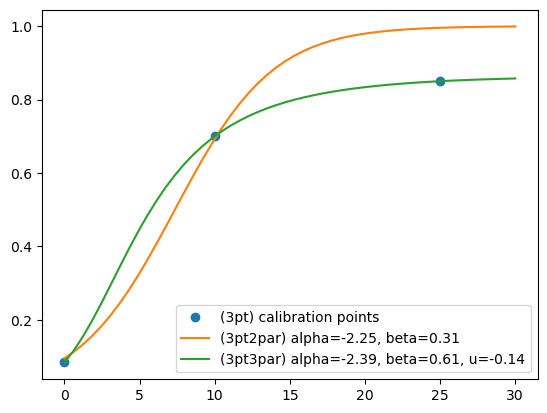

In [7]:
three_point_t = [0, 10, 25]
three_point_f = [0.084, 0.7, 0.85]

fig3, ax3 = plt.subplots()
ax3.plot(
    three_point_t,
    three_point_f,
    marker="o",
    linestyle="",
    label="(3pt) calibration points",
)
p3_opt = curve_fit(f=logistic, xdata=three_point_t, ydata=three_point_f, p0=p_guess)
a = p3_opt[0][0]
b = p3_opt[0][1]
ax3.plot(
    t,
    logistic(t, a, b),
    label=f"(3pt2par) alpha={round(a,2)}, beta={round(b,2)}",
)
p33_opt = curve_fit(f=elog, xdata=three_point_t, ydata=three_point_f, p0=[a,b,0])
a = p33_opt[0][0]
b = p33_opt[0][1]
u = p33_opt[0][2]
ax3.plot(
    t,
    elog(t, a, b, u),
    label=f"(3pt3par) alpha={round(a,2)}, beta={round(b,2)}, u={round(u,2)}",
)
ax3.legend();

Calibrate the 2-parameter, 3-parameter, and 4-parameter models with 4 new points (or some real EVC data)

In [8]:
[1.0,2.0]*2.0+[3.0,4.0]

TypeError: can't multiply sequence by non-int of type 'float'

(0.0, 0.2)

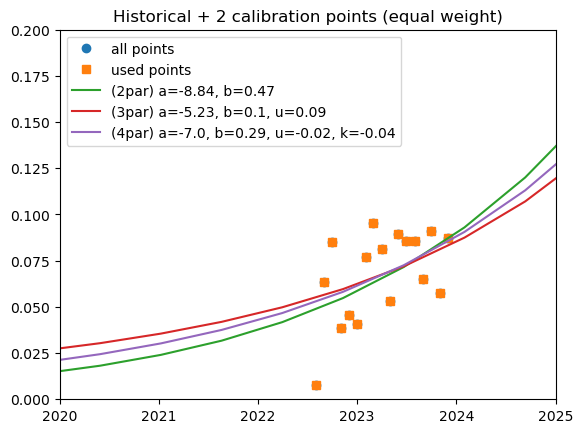

In [14]:
t1 = 2030
f1 = 60 # percent
t2 = 2035
f2 = 99 # percent 

case = 2
historical_scale_fac = 1.0 

if case == 1:
    calibration_weight = 100 # ignore the calibration points
    three_points_only = False
    title = "Historical only"
elif case == 2:
    calibration_weight = 1
    three_points_only = False
    title = "Historical + 2 calibration points (equal weight)"
elif case == 3:
    calibration_weight = 1
    three_points_only = True
    title = "Latest historical + 2 calibration points (equal weight)"
elif case == 4:
    calibration_weight = 1
    three_points_only = True
    title = "Historical + 2 calibration points (equal weight)"


base_year = 2010
point_t = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 13.5,t1-base_year,t2-base_year]
point_f = [0.0,
 0.00013675889328063241,
 0.00013037542662116042,
 0.00033676248108925865,
 0.0006428571428571428,
 0.0005855368882395908,
 0.0010049036777583188,
 0.0009978790613718413,
 0.0051202738910389985,
 0.005895217391304348,
 0.01631809823372853,
 0.03235203415241532,
 0.07763658201784489,f1/100,f2/100]

point_t = [12.58082191780818, 12.665753424657623, 12.747945205479482,
       12.832876712328698, 12.915068493150784,               13.0,
       13.084931506849216,  13.16164383561636, 13.246575342465803,
       13.328767123287662, 13.413698630136878, 13.495890410958964,
        13.58082191780818, 13.665753424657623, 13.747945205479482,
       13.832876712328698, 13.915068493150784, t1-base_year,t2-base_year]
point_f = [0.00749819, 0.06325077, 0.08515552, 0.03870152, 0.0455442 ,
       0.04094977, 0.07686897, 0.09557466, 0.08125677, 0.0534304 ,
       0.08924138, 0.08538894, 0.08586731, 0.06482242, 0.09130209,
       0.05757566, 0.08744597, f1/100, f2/100]

point_f[0:-2] = [f * historical_scale_fac for f in point_f[0:-2]]

point_t = np.array(point_t)
point_f = np.array(point_f)
sigma = np.ones(point_t.shape)
sigma[-1] = sigma[-1] * calibration_weight
sigma[-2] = sigma[-2] * calibration_weight

fig4, ax4 = plt.subplots()
ax4.plot(
    point_t+base_year,
    point_f,
    marker="o",
    linestyle="",
    label="all points",
)

if three_points_only:
    point_t = point_t[-3:]
    point_f = point_f[-3:]
    sigma = sigma[-3:]  

xtol = 1e-2

ax4.plot(
    point_t+base_year,
    point_f,
    marker="s",
    linestyle="",
    label="used points",
)
p4_opt = curve_fit(f=logistic, xdata=point_t, ydata=point_f, p0=p_guess, sigma=sigma, xtol=xtol)
a = p4_opt[0][0]
b = p4_opt[0][1]
ax4.plot(
    t+base_year,
    logistic(t, a, b),
    label=f"(2par) a={round(a,2)}, b={round(b,2)}",
)
p43_opt = curve_fit(f=elog, xdata=point_t, ydata=point_f, p0=[a,b,0], sigma=sigma, xtol=xtol)
a = p43_opt[0][0]
b = p43_opt[0][1]
u = p43_opt[0][2]
ax4.plot(
    t+base_year,
    elog(t, a, b, u),
    label=f"(3par) a={round(a,2)}, b={round(b,2)}, u={round(u,2)}",
)
if not three_points_only:
    p44_opt = curve_fit(f=flog, xdata=point_t, ydata=point_f, p0=[a,b,u,0], sigma=sigma, xtol=xtol)
    a = p44_opt[0][0]
    b = p44_opt[0][1]
    u = p44_opt[0][2]
    k = p44_opt[0][3]
    ax4.plot(
        t+base_year,
        flog(t, a, b, u, k),
        label=f"(4par) a={round(a,2)}, b={round(b,2)}, u={round(u,2)}, k={round(k,2)}",
    )
ax4.legend(loc="upper left");
plt.title(title)
# zoom in to x=[2020,2025] and y=[0,0.1]
ax4.set_xlim([2020,2025])
ax4.set_ylim([0,0.2])

In [29]:
flog(t, a, b, u, k)

array([1.24325462e-06, 1.69144596e-06, 2.32396735e-06, 3.22669614e-06,
       4.53057679e-06, 6.43814160e-06, 9.26747043e-06, 1.35263671e-05,
       2.00399413e-05, 3.01746147e-05, 4.62402676e-05, 7.22297741e-05,
       1.15214962e-04, 1.88057613e-04, 3.14840147e-04, 5.42119373e-04,
       9.63127141e-04, 1.77195298e-03, 3.39021680e-03, 6.77676931e-03,
       1.42170370e-02, 3.13851924e-02, 7.25457645e-02, 1.70643571e-01,
       3.75305785e-01, 6.66351904e-01, 8.86800497e-01, 9.74511082e-01,
       9.96052887e-01, 9.99615263e-01, 9.99981822e-01, 9.99999783e-01,
       1.00000000e+00,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan])